# NBA Player Analysis

In [1]:
#Importing the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import seaborn as sns
from scipy import stats

In [2]:
# Prepare the data
nbadf = pd.read_csv('playergames.csv', sep= ";")
nbadf['Over Age 27'] = np.where((nbadf['Age'] > 27), 1, 0)
nbadf['Over Age 27'].value_counts()
nbadf = nbadf.dropna()
nbadf = nbadf.drop_duplicates(subset='Player')
nbadf['Pos'] = nbadf['Pos'].replace('PF-SF', 'PF')

#there are more younger players by double in the league currently

In [3]:
display(nbadf)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Over Age 27
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2,0
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6,1
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4,0
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9,0
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,386,Jakob Poeltl,C,27,TOT,72,71,26.5,5.4,8.6,...,3.3,5.8,9.1,2.7,0.9,1.2,1.7,2.7,12.5,0
496,387,Aleksej Pokusevski,PF,21,OKC,34,25,20.6,3.2,7.3,...,1.3,3.4,4.7,1.9,0.6,1.3,1.3,1.7,8.1,0
497,388,Jordan Poole,PG,23,GSW,82,43,30.0,6.7,15.6,...,0.4,2.4,2.7,4.5,0.8,0.3,3.1,2.6,20.4,0
498,389,Kevin Porter Jr.,PG,22,HOU,59,59,34.3,6.6,15.0,...,1.3,4.0,5.3,5.7,1.4,0.3,3.2,2.6,19.2,0


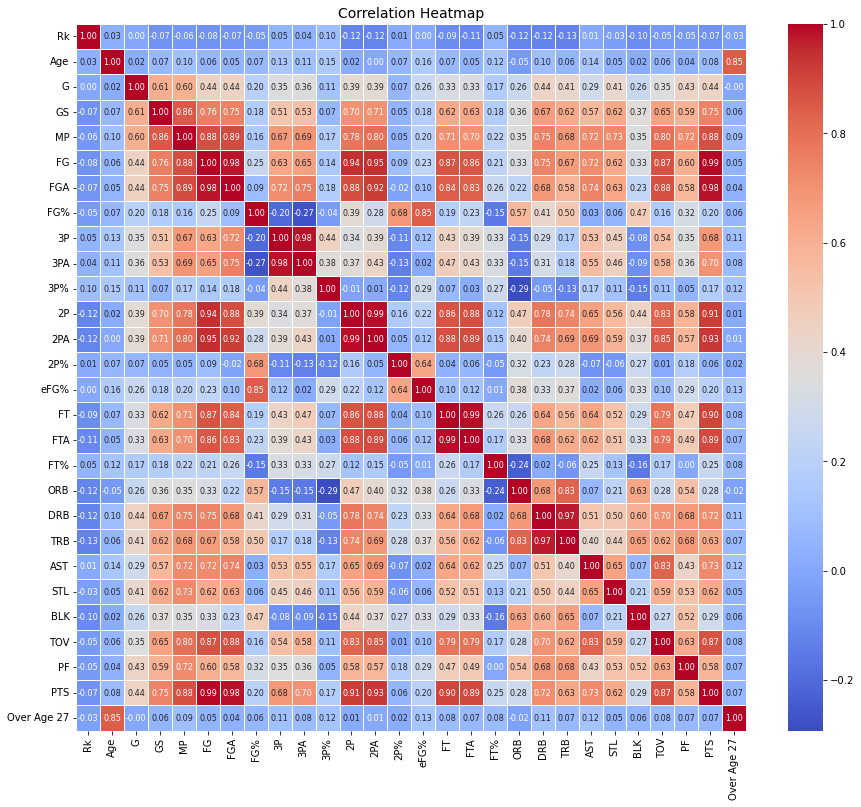

In [4]:

# Calculate the correlation matrix
corr_matrix = nbadf.corr()

# Set the figure size
plt.figure(figsize=(15, 13))

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", annot_kws={"fontsize": 8})

# Set the title
plt.title('Correlation Heatmap', fontsize=14)

# Show the plot
plt.show()

In [5]:
highestScorers = nbadf.loc[nbadf['PTS'] > 24, ['Player', 'PTS', 'Age', 'Pos', 'GS', 'AST', 'STL', 'BLK', 'TOV', 'FGA', 'eFG%', 'Over Age 27']]
highestScorers = highestScorers.sort_values('PTS', ascending=False)
highestScorers = highestScorers.drop_duplicates(subset='Player').reset_index(drop = True)
display(highestScorers)

,Player,PTS,Age,Pos,GS,AST,STL,BLK,TOV,FGA,eFG%,Over Age 27
0,Joel Embiid,33.1,28,C,66,4.2,1.0,1.7,3.4,20.1,0.573,1
1,Luka Dončić,32.4,23,PG,66,8.0,1.4,0.5,3.6,22.0,0.560,0
2,Damian Lillard,32.2,32,PG,58,7.3,0.9,0.3,3.3,20.7,0.564,1
3,Shai Gilgeous-Alexander,31.4,24,PG,68,5.5,1.6,1.0,2.8,20.3,0.531,0
4,Giannis Antetokounmpo,31.1,28,PF,63,5.7,0.8,0.8,3.9,20.3,0.572,1
5,Stephen Curry,29.4,34,PG,56,6.3,0.9,0.4,3.2,20.2,0.614,1
6,Kevin Durant,29.1,34,PF,47,5.0,0.7,1.4,3.3,18.3,0.614,1
7,LeBron James,28.9,38,PF,54,6.8,0.9,0.6,3.2,22.2,0.549,1
8,Donovan Mitchell,28.3,26,SG,68,4.4,1.5,0.4,2.6,20.6,0.572,0
9,Devin Booker,27.8,26,SG,53,5.5,1.0,0.3,2.7,20.1,0.546,0


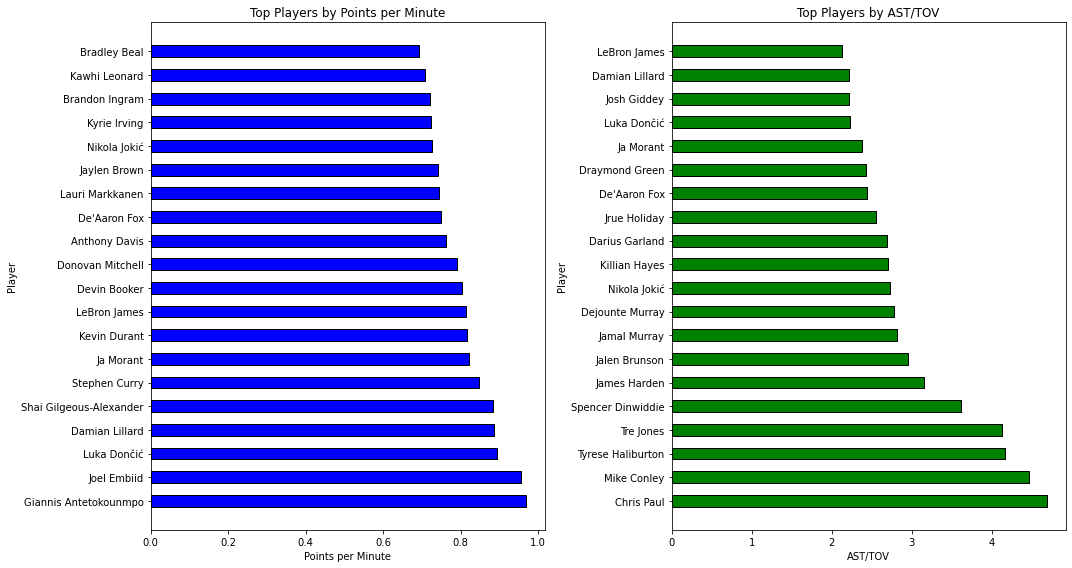

In [6]:
nbadf['Points per Minute'] = nbadf['PTS'] / nbadf['MP']
nbadf['AST/TOV'] = nbadf['AST'] / nbadf['TOV']

# Filter the data for Points per Minute plot
filtered_points_data = nbadf.query("MP >= 20").query("PTS >= 20").sort_values('Points per Minute', ascending=False).head(20)

# Filter the data for AST/TOV plot
filtered_ast_data = nbadf.query("AST >= 6").query("G >= 50").sort_values('AST/TOV', ascending=False).head(20)

# Set up the subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Plot for Points per Minute
axes[0].barh(filtered_points_data['Player'], filtered_points_data['Points per Minute'], color='blue', height=0.5, edgecolor='black')
axes[0].set_xlabel('Points per Minute')
axes[0].set_ylabel('Player')
axes[0].set_title('Top Players by Points per Minute')

# Plot for AST/TOV
axes[1].barh(filtered_ast_data['Player'], filtered_ast_data['AST/TOV'], color='green', height=0.5, edgecolor='black')
axes[1].set_xlabel('AST/TOV')
axes[1].set_ylabel('Player')
axes[1].set_title('Top Players by AST/TOV')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

In the following plot we can see the top players by Points Per Minute and Top Players by AST/TOV. AST/TOV (Assist-to-Turnover Ratio) is calculated by dividing the number of assists (AST) by the number of turnovers (TOV) for each player.
PTS per minute (Points per Minute) is calculated by dividing the total points (PTS) by the total minutes played (MP) for each player.

Both ratios provide insights into a player's performance and efficiency in terms of assists, turnovers, and scoring rate. We can observe that Chris Paul has the highest AST/TOV Ratio indicating that he is efficient at setting up his teammates without turning the ball over.


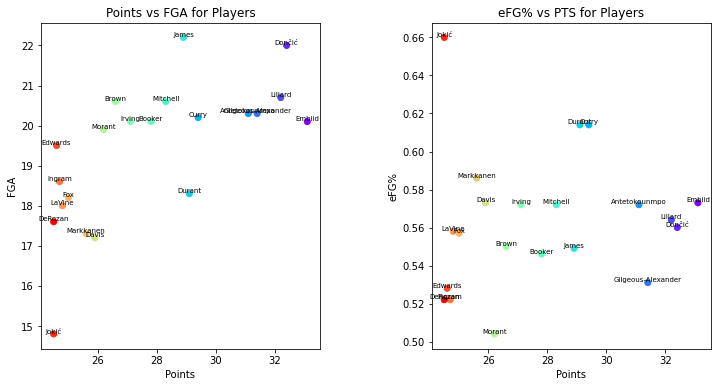

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for Points vs FGA
ax1.scatter(highestScorers['PTS'], highestScorers['FGA'], c=range(len(highestScorers)), cmap='rainbow')
ax1.set_title('Points vs FGA for Players')
ax1.set_xlabel('Points')
ax1.set_ylabel('FGA')

for i, txt in enumerate(highestScorers['Player']):
    name_parts = txt.split()
    name = name_parts[1] if len(name_parts) > 1 else txt
    ax1.annotate(name, (highestScorers['PTS'][i], highestScorers['FGA'][i]), fontsize=7, ha='center', va='bottom')

# Scatter plot for eFG% vs PTS
ax2.scatter(highestScorers['PTS'], highestScorers['eFG%'], c=range(len(highestScorers)), cmap='rainbow')
ax2.set_title('eFG% vs PTS for Players')
ax2.set_xlabel('Points')
ax2.set_ylabel('eFG%')

for i, txt in enumerate(highestScorers['Player']):
    name_parts = txt.split()
    name = name_parts[1] if len(name_parts) > 1 else txt
    ax2.annotate(name, (highestScorers['PTS'][i], highestScorers['eFG%'][i]), fontsize=7, ha='center', va='bottom')

# Adjusting the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Display the plot
plt.show()


Scatter plot of Points vs. FGA (Field Goal Attempts) Top 21 Players:
The scatter plot showcases the relationship between the number of field goal attempts (FGA) and the points scored by players. 
Each point on the plot represents a player, where the x-axis represents the FGA and the y-axis represents the points. 

The key observed insights are that Jokic averages 25 points while taking a very low amount of FGA every game. In essence that means Nikola Jokic is very efficient with his low FGA. The players that are taking a high volume of shots are (Luka, Lebron, Giannis, Lillard, Shai and Mitchell).

Furthermore we can observe that Embiid tops the PPG with a lower FGA in comparison to his peers in the same PPG range.
 
eFG% by Player:
A high eFG% for Jokić suggests that he is a highly efficient shooter, meaning he has a high likelihood of making shots and converting them into points. This could be due to his shooting technique, shot selection, and ability to score efficiently from various positions on the court. 
The eFG% takes into account the value of three-point shots by giving them extra weight. It is calculated as (FGM + 0.5 * 3PM) / FGA, 


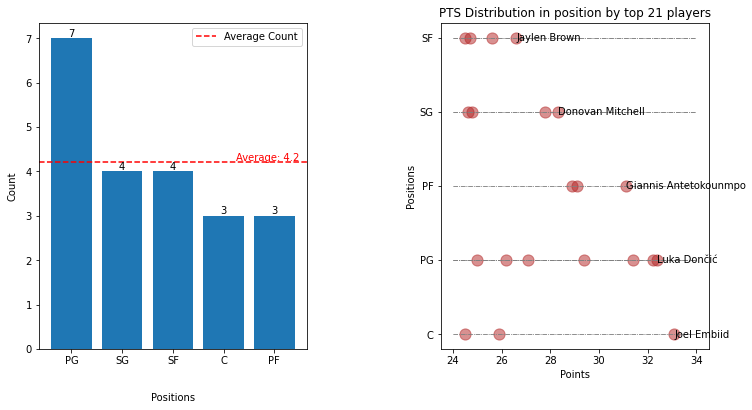

In [8]:
position = highestScorers['Pos'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the data
ax1.bar(position.index, position.values)

# Adding value labels to the bars
for i, value in enumerate(position.values):
    ax1.text(i, value, str(value), ha='center', va='bottom', fontsize=10)

# Adding a horizontal line at the average count
average_count = np.mean(position.values)
ax1.axhline(average_count, color='red', linestyle='--', label='Average Count')
ax1.text(len(position) - 0.5, average_count, f'Average: {average_count:.1f}', ha='right', va='bottom', color='red')

# Adding text annotations on x-axis and y-axis
ax1.text(0.5, -0.15, 'Positions', transform=ax1.transAxes, ha='center', va='center')
ax1.text(-0.1, 0.5, 'Count', transform=ax1.transAxes, ha='center', va='center', rotation=90)

# Displaying the legend
ax1.legend()

# Scatter plot of PTS distribution by position
ax2.hlines(y=highestScorers.Pos, xmin=24, xmax=34, color='gray', alpha=0.7, linewidth=0.7, linestyles='dashdot')
ax2.scatter(y=highestScorers.Pos, x=highestScorers.PTS, s=125, color='firebrick', alpha=0.5)

# Adding player names to the scatter plot (only for the highest point scorer in each position)
for position in highestScorers['Pos'].unique():
    highest_scorer = highestScorers[highestScorers['Pos'] == position].iloc[0]
    ax2.annotate(highest_scorer['Player'], (highest_scorer['PTS'], highest_scorer['Pos']), ha='left', va='center')

# Customizing the plot
plt.title('PTS Distribution in position by top 21 players')
plt.xlabel('Points')
plt.ylabel('Positions')

# Display the plots
plt.subplots_adjust(wspace=0.5)
plt.show()


The barplot displays the amount of players in every single position among the top 21 scorers by (PPG). In that regard the Point Guards are most frequently observed followed by Shooting Guards and Shooting Forwards.  

The second subplot is a plot that showcases the relationship between the player's position (Pos) and points (PTS). The scatter plot uses the player's position as the y-axis and points as the x-axis. Each data point among the line reprents the distribution of the player. Here it can be observed that (Jaylen Brown, Donovan Mitchell, Giannis, Luka Doncic and Joel Embiid) are the highest PPG scorers in their respective positions.



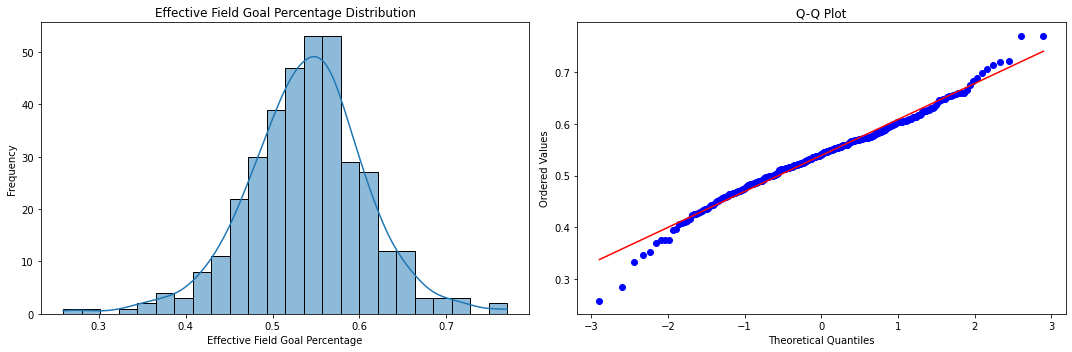

count    366.000000
mean       0.538992
std        0.069685
min        0.259000
25%        0.499250
50%        0.541000
75%        0.576750
max        0.770000
Name: eFG%, dtype: float64

In [9]:
# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Histogram and KDE plot
sns.histplot(nbadf['eFG%'], kde=True, ax=ax1)
ax1.set_title('Effective Field Goal Percentage Distribution')
ax1.set_xlabel('Effective Field Goal Percentage')
ax1.set_ylabel('Frequency')

# Q-Q plot
stats.probplot(nbadf['eFG%'], plot=ax2)
ax2.set_title('Q-Q Plot')
ax2.set_xlabel('Theoretical Quantiles')
ax2.set_ylabel('Ordered Values')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()
statistics = nbadf['eFG%'].describe()

# Print the descriptive statistics
display(statistics)

Histogram of Effective Field Goal Percentage (eFG%):
The histogram plot visualizes the distribution of the effective field goal percentage (eFG%) across the dataset. The x-axis represents the eFG% values, and the y-axis represents the frequency or count of observations falling within each eFG% bin. The plot provides an overview of the distribution and can indicate the concentration of data points within specific eFG% ranges.

The mean eFG% of 0.538992 suggests that, on average, the players in the dataset have a shooting efficiency of around 53.9%. This indicates that more than half of their field goal attempts result in successful shots, taking into account the added value of three-pointers.

Q-Q Plot:
When the Q-Q plot closely follows a straight line as can be observed in our plot above, it indicates that the dataset's distribution is approximately similar to the theoretical distribution being compared. The straight line is typically the line of equality, where the quantiles of the dataset perfectly match the quantiles of the theoretical distribution. Deviations from the straight line suggest departures from the assumed distribution.



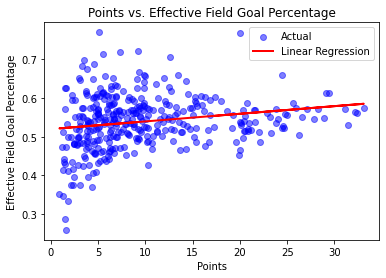

In [10]:
# Prepare the data
X = nbadf['PTS'].values.reshape(-1, 1)
y = nbadf['eFG%'].values.reshape(-1, 1)

# Remove missing values
mask = np.logical_and(~np.isnan(X), ~np.isnan(y))
X = X[mask].reshape(-1, 1)
y = y[mask].reshape(-1, 1)

# Check for infinite or large values
mask = np.logical_and(np.isfinite(X), np.isfinite(y))
X = X[mask].reshape(-1, 1)
y = y[mask].reshape(-1, 1)

# Create the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Plot the scatter points and regression line
fig, ax = plt.subplots()
ax.scatter(X, y, color='blue', alpha=0.5, label='Actual')
ax.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression')

# Set plot labels and title
ax.set_xlabel('Points')
ax.set_ylabel('Effective Field Goal Percentage')
ax.set_title('Points vs. Effective Field Goal Percentage')

# Display the legend and plot
ax.legend()
plt.show()

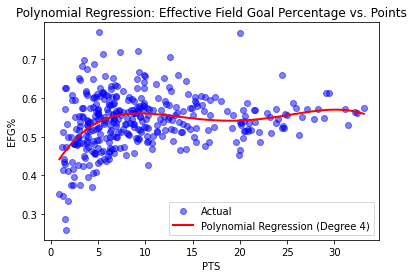

In [11]:

# Create polynomial features
degree = 4  # Adjust the degree as needed
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Make predictions
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_poly = poly_features.transform(X_range)
y_pred = model.predict(X_range_poly)

# Plot the scatter points and best-fit curve
plt.scatter(X, y, color='blue', alpha=0.5, label='Actual')
plt.plot(X_range, y_pred, color='red', linewidth=2, label='Polynomial Regression (Degree {})'.format(degree))

# Set plot labels and title
plt.xlabel('PTS')
plt.ylabel('EFG%')
plt.title('Polynomial Regression: Effective Field Goal Percentage vs. Points')

# Display the legend and plot
plt.legend()
plt.show()

# Cluster segmentation and analysis

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select the columns for clustering
columns = ['PTS','MP', 'G', 'eFG%', 'FG', 'FGA', 'FG%', '2P%', '3P%', 'Age', 'AST', 'STL', 'BLK', 'TOV', "ORB","DRB","TRB"]

# Create a subset of data for clustering
data = nbadf[columns]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Choose the number of clusters
k = 4

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_scaled)

# Get the cluster labels
labels = kmeans.labels_

# Add the cluster labels to the original dataframe
nbadf['Cluster'] = labels

# Print the cluster assignments
print(nbadf[['Player', 'Cluster']])

# Perform further analysis on the clusters
cluster_0 = nbadf[nbadf['Cluster'] == 0]
cluster_1 = nbadf[nbadf['Cluster'] == 1]
cluster_2 = nbadf[nbadf['Cluster'] == 2]
cluster_3 = nbadf[nbadf['Cluster'] == 3]


                 Player  Cluster
0      Precious Achiuwa        0
1          Steven Adams        3
2           Bam Adebayo        3
3          Ochai Agbaji        2
4          Santi Aldama        0
..                  ...      ...
493        Jakob Poeltl        3
496  Aleksej Pokusevski        0
497        Jordan Poole        1
498    Kevin Porter Jr.        1
499  Michael Porter Jr.        0

[366 rows x 2 columns]


In [13]:
# Cluster 0
cluster_0 = nbadf[nbadf['Cluster'] == 0]
print("Cluster 0:")
print(cluster_0[['Player','PTS','MP', 'G', 'eFG%', 'FG', 'FGA', 'FG%', '2P%', '3P%', 'Age', 'AST', 'STL', 'BLK', 'TOV', 'ORB','DRB','TRB']])

# Cluster 
cluster_1 = nbadf[nbadf['Cluster'] == 1]
print("Cluster 1:")
print(cluster_1[['Player','PTS','MP', 'G', 'eFG%', 'FG', 'FGA', 'FG%', '2P%', '3P%', 'Age', 'AST', 'STL', 'BLK', 'TOV', 'ORB','DRB','TRB']])

# Cluster 2
cluster_2 = nbadf[nbadf['Cluster'] == 2]
print("Cluster 2:")
print(cluster_2[['Player','PTS','MP', 'G', 'eFG%', 'FG', 'FGA', 'FG%', '2P%', '3P%', 'Age', 'AST', 'STL', 'BLK', 'TOV', 'ORB','DRB','TRB']])

# Cluster 3
cluster_3 = nbadf[nbadf['Cluster'] == 3]
print("Cluster 3:")
print(cluster_3[['Player','PTS','MP', 'G', 'eFG%', 'FG', 'FGA', 'FG%', '2P%', '3P%', 'Age', 'AST', 'STL', 'BLK', 'TOV', 'ORB','DRB','TRB']])


Cluster 0:
                 Player   PTS    MP   G   eFG%   FG   FGA    FG%    2P%  \
0      Precious Achiuwa   9.2  20.7  55  0.521  3.6   7.3  0.485  0.564   
4          Santi Aldama   9.0  21.8  77  0.560  3.2   6.8  0.470  0.591   
8         Grayson Allen  10.4  27.4  72  0.571  3.4   7.7  0.440  0.518   
10        Jose Alvarado   9.0  21.5  61  0.496  3.3   8.0  0.411  0.488   
11        Kyle Anderson   9.4  28.4  69  0.553  3.7   7.2  0.509  0.536   
..                  ...   ...   ...  ..    ...  ...   ...    ...    ...   
481          Cedi Osman   8.7  20.1  77  0.560  3.1   6.9  0.451  0.564   
484       Cameron Payne  10.3  20.2  48  0.490  3.9   9.4  0.415  0.448   
485      Gary Payton II   4.6  16.7  22  0.688  1.9   3.1  0.594  0.651   
496  Aleksej Pokusevski   8.1  20.6  34  0.510  3.2   7.3  0.434  0.483   
499  Michael Porter Jr.  17.4  29.0  62  0.602  6.4  13.2  0.487  0.579   

       3P%  Age  AST  STL  BLK  TOV  ORB  DRB  TRB  
0    0.269   23  0.9  0.6  0.5  1.1

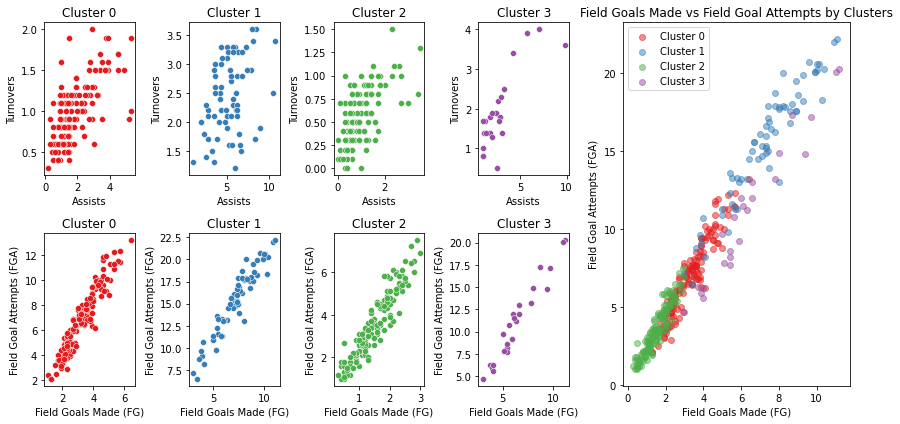

In [14]:
import matplotlib.gridspec as gridspec

# Define the layout of the subplots
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(2, k+1, width_ratios=[2]*k + [5])

# Define a color palette
colors = sns.color_palette('Set1', n_colors=k)

# Create subplots for AST vs TOV by cluster
for cluster_num in range(k):
    cluster_data = nbadf[nbadf['Cluster'] == cluster_num]
    ax = plt.subplot(gs[0, cluster_num])
    sns.scatterplot(x='AST', y='TOV', data=cluster_data, ax=ax, color=colors[cluster_num])
    ax.set_xlabel('Assists')
    ax.set_ylabel('Turnovers')
    ax.set_title(f'Cluster {cluster_num}')

# Create subplots for FG vs FGA by cluster
for cluster_num in range(k):
    cluster_data = nbadf[nbadf['Cluster'] == cluster_num]
    ax = plt.subplot(gs[1, cluster_num])
    sns.scatterplot(x='FG', y='FGA', data=cluster_data, ax=ax, color=colors[cluster_num])
    ax.set_xlabel('Field Goals Made (FG)')
    ax.set_ylabel('Field Goal Attempts (FGA)')
    ax.set_title(f'Cluster {cluster_num}')
    # Create subplots for AST vs TOV by cluster

# Create a scatter plot for all clusters
ax = plt.subplot(gs[:, -1])
for cluster_label in range(k):
    cluster_data = nbadf[nbadf['Cluster'] == cluster_label]
    plt.scatter(cluster_data['FG'], cluster_data['FGA'], label=f'Cluster {cluster_label}', alpha=0.5, color=colors[cluster_label])

# Set plot labels and title
plt.xlabel('Field Goals Made (FG)')
plt.ylabel('Field Goal Attempts (FGA)')
plt.title('Field Goals Made vs Field Goal Attempts by Clusters')

# Add legend
plt.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

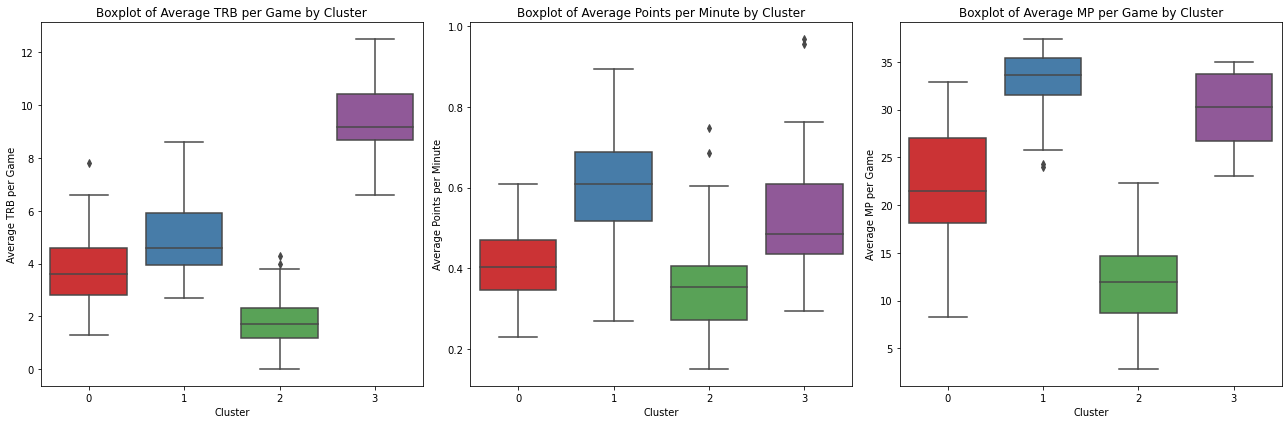

In [20]:
cluster_data = nbadf[['Cluster', 'TRB', 'MP', 'Points per Minute']]

colors = sns.color_palette('Set1', n_colors=k)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='Cluster', y='TRB', data=cluster_data, palette=colors)
plt.xlabel('Cluster')
plt.ylabel('Average TRB per Game')
plt.title('Boxplot of Average TRB per Game by Cluster')

plt.subplot(1, 3, 2)
sns.boxplot(x='Cluster', y='Points per Minute', data=cluster_data, palette=colors)
plt.xlabel('Cluster')
plt.ylabel('Average Points per Minute')
plt.title('Boxplot of Average Points per Minute by Cluster')

plt.subplot(1, 3, 3)
sns.boxplot(x='Cluster', y='MP', data=cluster_data, palette=colors)
plt.xlabel('Cluster')
plt.ylabel('Average MP per Game')
plt.title('Boxplot of Average MP per Game by Cluster')

plt.tight_layout()
plt.show()

# Conclusion

Cluster 0: Players in this cluster (Red) generally are decent role players having average numbers across all stats. These are players that can give teams value in the minutes they play.

Cluster 1: It can be noted that Cluster 1 (Blue) shows a tendency to have higher stats (PTS, ASSISTS, FGA/FM) and in that regard are superior to their peers in most categories. These players are starters or superstars for their teams.

Cluster 2: These are players that aren't getting many minutes but also don't have a big impact while they're on the field. As can be be observed on the plot, the players in cluster 2 have lowest average points per minute out of any of the clusters.

Cluster 3: Likewise Cluster 3 (Purple) have very good stats and generally is on the field quite a lot. Cluster 3 is unique in their ability to rebound that highly differentiates them from the other clusters.